## Berchmans Kevin S



## Predictive Analytics for Hospitals

In [1]:
import warnings
warnings.filterwarnings('ignore')

##### `Step-1: Import dataset`


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
# Printing the first five rows of the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Printing the shape of the dataset
df.shape

(768, 9)

In [6]:
# Printing the total no. of elements in the dataset

df.size

6912

In [7]:
# Printing all the attributes of the dataset

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Printing type of attributes of the dataset

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Printing summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Printing unique value counts of the dataset
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

##### `Step-2: Identify relationships between feature`

<AxesSubplot:>

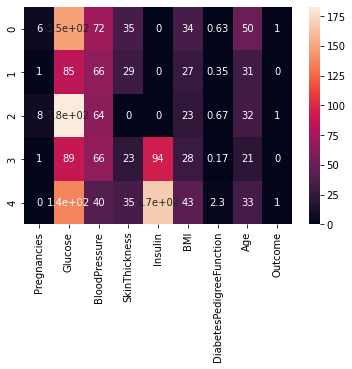

In [11]:
# create heatmap for the dataset to understand the data

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.head(), annot=True)

##### `Step-3: Prediction using one feature`
#### `Create Logistic Regression Mode`

In [12]:
X = df[['Age']]
y = df[['Outcome']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train, y_train)
lor.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#####   `Model parameter values`

In [13]:
print("coef_ : ",lor.coef_)

coef_ :  [[0.05221912]]


In [14]:
print("intercept_ : ",lor.intercept_)

intercept_ :  [-2.39506398]


##### `Query: A person is 60 years old, will he be diabetic?`

In [15]:
y_pred = lor.predict([[60]])[0]

if y_pred == 1:
 print('YES, person with 60 years will become diabetic')

elif y_pred == 0:
 print('NO, person with 60 years will not be diabetic')

YES, person with 60 years will become diabetic


##### `Model parameters and function value`


In [16]:
lrf = lor.coef_ * 60 + lor.intercept_

from scipy.special import expit
expit(lrf)
if expit(lrf) > 0.5:
 print('YES, he will become diabetic')
else:
 print('NO, he will not be diabetic')

YES, he will become diabetic


##### `Step-4: Prediction using many features`
#### `Selecting 3 features`

In [17]:
X1 = df[['Glucose','BMI','Age']]
y1 = df[['Outcome']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

##### `Creating new lor model for 3 features`

In [18]:
lor1 = LogisticRegression()
lor1.fit(X1_train, y1_train)
lor1.predict(X1_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### `Query: For a person Glucose=150, BMI=30, Age=40, will he be diabetic?`

In [19]:
print("coef_ : ",lor1.coef_)
print("intercept_ : ",lor1.intercept_)

coef_ :  [[0.03326879 0.09717039 0.04404934]]
intercept_ :  [-9.47396587]


In [20]:
lrf1 = lor1.coef_ * 150 * 30 * 40 + lor1.intercept_
from scipy.special import expit
expit(lrf1)

array([[1., 1., 1.]])

In [21]:
lor1.predict_proba([[150,30,40]])

array([[0.45179089, 0.54820911]])

In [22]:
y1_pred = lor1.predict([[150,30,40]])[0]

if y1_pred == 1:
 print('YES, person with Glucose=150, BMI=30, Age=40 will become diabetic')
elif y1_pred == 0:
 print('NO, person with Glucose=150, BMI=30, Age=40 will not be diabetic')

YES, person with Glucose=150, BMI=30, Age=40 will become diabetic


#### `Step-5: Build LOR model with all features`
#### `Creating lor model for all features`

In [23]:
X2 = df.drop(['Outcome'],axis=1)
y2 = df[['Outcome']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
lor2 = LogisticRegression()
lor2.fit(X2_train,y2_train)                                                      
y2_pred = lor2.predict(X2_test)
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### ` AUC Score `

In [24]:
from sklearn.metrics import roc_auc_score
lor_auc = roc_auc_score(y2_test, y2_pred)
print("AUC Score:", lor_auc)

AUC Score: 0.7122658183103571


#### `Step-6: Forward selection procedure`
#### `Function get_auc()`

In [25]:
def get_auc(var, tar, df):
    fX = df[var]
    fy = df[tar]
    lor4 = LogisticRegression()
    lor4.fit(fX, fy)
    pred = lor4.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y2, pred)
    return auc_val

get_auc(['Glucose', 'BMI'], ['Outcome'], df)

0.8109328358208956

In [26]:
get_auc(['Pregnancies','BloodPressure','SkinThickness'], ['Outcome'], df)

0.6444962686567164

##### `Function best_next()`

In [27]:
def best_next(current, cand, tar, df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = get_auc(current+[i], tar, df)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_var = i
    return best_var

In [28]:
tar = ['Outcome']
current = ['Insulin','BMI','DiabetesPedigreeFunction','Age']
cand = ['Pregnancies','Glucose','BloodPressure','SkinThickness']
next_var = best_next(current, cand, tar, df)
print(next_var)


Glucose


In [29]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

max_num = 7
num_it = min(max_num, len(cand))
for i in range(0, num_it):
 next_var = best_next(current, cand, tar, df)
 current += [next_var]
 cand.remove(next_var)
 print("Variable added in Step "+str(i+1) +' is ' + next_var +".")

Variable added in Step 1 is Outcome.
Variable added in Step 2 is Age.
Variable added in Step 3 is DiabetesPedigreeFunction.
Variable added in Step 4 is BMI.
Variable added in Step 5 is Insulin.
Variable added in Step 6 is SkinThickness.
Variable added in Step 7 is BloodPressure.


In [30]:
print(current)

['Outcome', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure']


##### ` Step-7: PLOT LINE GRAPH OF AUC VALUES AND SELCECT CUT-OFF`

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, test_size=0.5, random_state=42)

In [32]:
prediction = lor2.predict_proba(X2_test)

In [33]:
# plot AUC values for each variable

train = pd.concat([X2_train, y2_train], axis =1)
test = pd.concat([X2_test, y2_test], axis =1)

def auc_train_test (variables, target, train, test):
    X_train = train [variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    LOR3 = LogisticRegression()
    LOR3.fit(X_train, Y_train)
    predictions_train = LOR3.predict_proba(X_train)[:,1]
    predictions_test = LOR3.predict_proba(X_test)[:,1]
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_train, predictions_test)
    return (auc_train, auc_test)

auc_values_train = []
auc_values_test = []
variables_evaluate = []

for v in X2.columns:
    variables_evaluate.append(v)
    auc_train, auc_test = auc_train_test(variables_evaluate, ['Outcome'], train, test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    


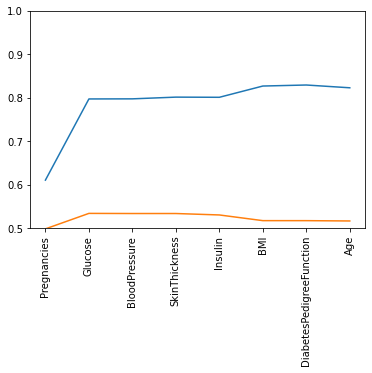

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0, len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)

plt.xticks(x, X2.columns, rotation =90)
plt.plot(x, my_train)
plt.plot(x, my_test)
plt.ylim(0.5, 1)
plt.show()

### Step-8: DRAW CUMULATIVE GAIN CHART AND LIFT CHART

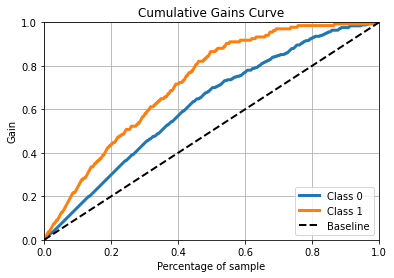

<Figure size 504x504 with 0 Axes>

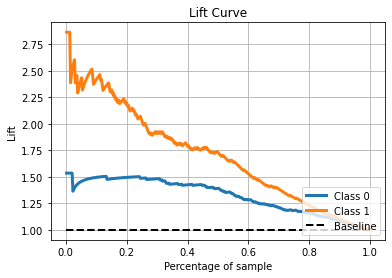

In [35]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y2_test, prediction)
plt.show()

plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y2_test, prediction)
plt.show()